# Problem Set 3

Due in your git fork by 11:59pm Pacfic time on Wednesday, November 1st.

All problems have equal weight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

## Problem 1: Importance Sampling

(a) Estimate the integral $$\int_0^{\pi} \sin(x)\mathrm{d}x$$ and the uncertainty on the estimate by using uniform sampling over the interval. 

In [9]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# Problem One Requires the following:

## (a). Estimate the integral of sin(x) in the interval [0, pi], and its uncertainty using uniform sampling over the interval
## (b) Plot the uncertainty estimate (from uniform sampling) as a function of N, the number of points evaluated. How does the uncertainty change with N?
def f(x):
    return np.sin(x)

def montCarl_us(a, b, N):
    sum1 = 0.0
    sum2 = 0.0
    errorF = []
    for i in range(1,N):
        xR = np.random.uniform(a, b)
        sum1 += f(xR)
        sum2 += pow(f(xR), 2)
        ei = ((b-a)/(np.sqrt(i))) * np.sqrt((sum2/i - pow(sum1/i,2)))
        errorF.append(ei)
    val = ((b-a)/N)*sum1
    error = ((b-a)/(np.sqrt(N))) * np.sqrt((sum2/N - pow(sum1/N,2)))
    return val, errorF, error

def main():
    a = 0
    b = np.pi
    N = 1000
    integral, errorF, error = montCarl_us(a, b, N)
    print(f"For N = {N}, the value of the integral is {integral} +/- {error}.".format(N,integral,error))
    
if __name__ =="__main__":
    main()

For N = 1000, the value of the integral is 2.0479017129970645 +/- 0.02972440472198052.


(b) Plot the uncertainty estimate (from uniform sampling) as a function of $N$, the number of points evaluated. How does the uncertainty change with $N$? 

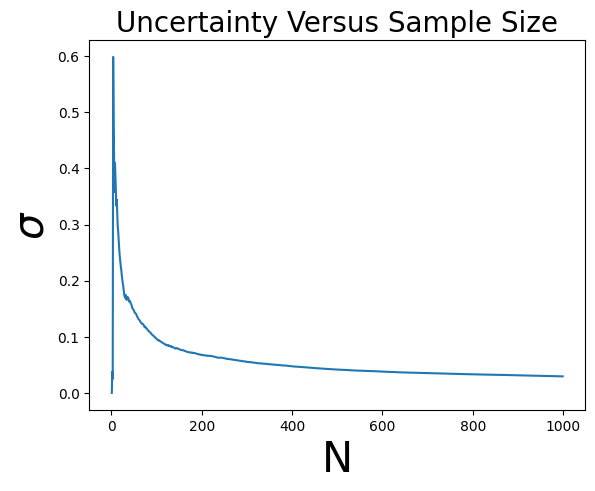

It changes as (N)^-1/2.


In [73]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# Problem One Requires the following:

## (a). Estimate the integral of sin(x) in the interval [0, pi], and its uncertainty using uniform sampling over the interval
## (b) Plot the uncertainty estimate (from uniform sampling) as a function of N, the number of points evaluated. How does the uncertainty change with N?
def f(x):
    return np.sin(x)

def montCarl_us(a, b, N):
    sum1 = 0.0
    sum2 = 0.0
    errorF = []
    for i in range(1,N):
        xR = np.random.uniform(a, b)
        sum1 += f(xR)
        sum2 += pow(f(xR), 2)
        ei = ((b-a)/(np.sqrt(i))) * np.sqrt((sum2/i - pow(sum1/i,2)))
        errorF.append(ei)
    val = ((b-a)/N)*sum1
    error = ((b-a)/(np.sqrt(N))) * np.sqrt((sum2/N - pow(sum1/N,2)))
    return val, errorF, error

def main():
    a = 0
    b = np.pi
    N = 1000
    integral, errorF, error = montCarl_us(a, b, N)
    plt.plot(range(1,N), errorF)
    plt.title("Uncertainty Versus Sample Size", size = 20)
    plt.xlabel("N", size = 30)
    plt.ylabel("$\\sigma$", size = 30)
    plt.show()
    print("It changes as (N)^-1/2.")

if __name__ =="__main__":
    main()


(c) Estimate the same integral and the uncertainty on the estimate by using importance sampling. (It may be helpful to note that $$\sin x \approx \frac{4}{\pi^2}x(\pi − x)$$ over the interval $[0,\pi]$.)

In [19]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random
import cmath

# Problem One Requires the following:

## (c) Estimate the same integral and the uncertainty on the estimate by using importance sampling [hint: sin(x) \approx (4/pi^2)*x*(pi - x)] over the interval [0,pi]
## (d) Plot the uncertainty estimate (from importance sampling) as a function of N, the number of points evaluated. How does the uncertainty change with N, and how does the sampling compare to (b)?
def w(x):
    return (6./pow(np.pi,3))*(np.pi*x-pow(x,2))

def x(y):
    x_1 = (complex(-1, pow(3, 0.5)))*pow(-2*y + 2*pow((y-1)*y , 1/2)+1, 1/3) - complex(1, pow(3, 1/2))*pow(-2*y + 2*pow((y-1)*y , 1/2)+1, -1/3) + 2.
    return (np.pi/4.)*(x_1)

def f(x):
    return np.sin(x)

def montCarl_us(a,b,N):
    sum1 = 0.0
    sum2 = 0.0
    xVals = []
    error =[]
    for i in range(1,N):
        y = random.random()
        x_y = x(y)
        integrand = (f(x_y)/w(x_y))
        sum1 += integrand
        sum2 += pow(integrand, 2)
        ei = ((b-a)/(np.sqrt(i))) * np.sqrt((sum2/i - pow(sum1/i,2)))
        error.append(ei)
    val = ((b-a)/N)*sum1
    ei = ((x(0)-x(1))/(np.sqrt(N))) * np.sqrt((sum2/N - pow(sum1/N,2)))
    return val, ei

def main():
    N = 10000
    a = 0
    b = np.pi
    integral, error = montCarl_us(a, b, N)
    print(f"For N = {N}, the value of the integral is {integral.real} +\- {error.real}.".format(N,integral.real,error.real))

if __name__ =="__main__":
    main()



For N = 10000, the value of the integral is 3.1350558007809894 +\- 0.0034262943686529995.


(d) Plot the uncertainty estimate (from importance sampling) as a function of $N$, the number of points evaluated. How does the uncertainty change with $N$, and how does it compare to part (b)?

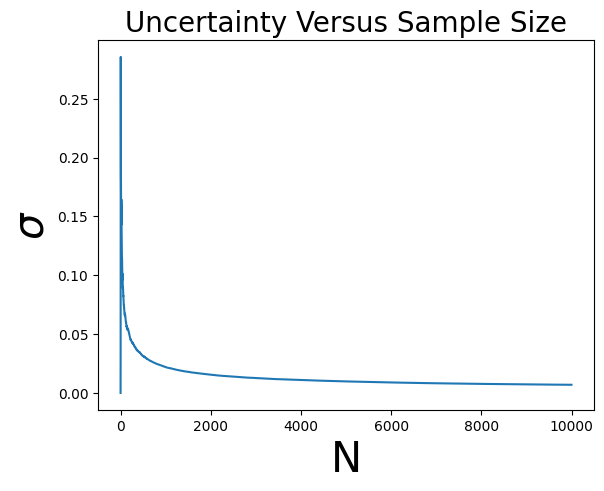

In [72]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random
import cmath

# Problem One Requires the following:

## (c) Estimate the same integral and the uncertainty on the estimate by using importance sampling [hint: sin(x) \approx (4/pi^2)*x*(pi - x)] over the interval [0,pi]
## (d) Plot the uncertainty estimate (from importance sampling) as a function of N, the number of points evaluated. How does the uncertainty change with N, and how does the sampling compare to (b)?
def w(x):
    return (6./pow(np.pi,3))*(np.pi*x-pow(x,2))

def x(y):
    x_1 = (complex(-1, pow(3, 0.5)))*pow(-2*y + 2*pow((y-1)*y , 1/2)+1, 1/3) - complex(1, pow(3, 1/2))*pow(-2*y + 2*pow((y-1)*y , 1/2)+1, -1/3) + 2.
    return (np.pi/4.)*(x_1)

def f(x):
    return np.sin(x)

def montCarl_us(a,b,N):
    sum1 = 0.0
    sum2 = 0.0
    xVals = []
    error =[]
    for i in range(1,N):
        y = random.random()
        x_y = x(y)
        integrand = (f(x_y)/w(x_y))
        sum1 += integrand
        sum2 += pow(integrand, 2)
        ei = ((b-a)/(np.sqrt(i))) * np.sqrt((sum2/i - pow(sum1/i,2)))
        error.append(ei)
    val = ((b-a)/N)*sum1
    ei = ((x(y)-x(y))/(np.sqrt(N))) * np.sqrt((sum2/N - pow(sum1/N,2)))
    plt.plot(np.arange(1,N), error)
    plt.title("Uncertainty Versus Sample Size", size = 20)
    plt.xlabel("N", size = 30)
    plt.ylabel("$\\sigma$", size = 30)
    plt.show()
    return val, ei

def main():
    N = 10000
    a = 0
    b = np.pi
    integral, error = montCarl_us(a, b, N)
if __name__ =="__main__":
    main()



## Problem 2: Acceptance/rejection

Use the von Neumann (acceptance/rejection) method to estimate the following integrals numerically, including uncertainties. (Each of these integrals presents a new wrinkle in the calculation.)

(a) $\int_1^2 x^2 \mathrm{d}x$

In [21]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# Using the von Neumann method, estimate the following integrals numerically, including the uncertainties. (Notice that the integrals show faults in the calculations)

## (a) integral of x^2 over the interval [1,2]
def w(x):
    return 3*pow((x-1),2)

def f(x):
    return pow(x,2)

def montCarl_2(a,b,N):
    sum1 = 0.
    sum2 = 0.
    number = 0

    aXvals = []
    rXvals = []
    aFvals = []
    rFvals = []
    aYvals = []
    rYvals = []
    aWvals = []
    rWvals = []
    while number < N:
        trial_x = random.uniform(a,b)
        trial_y = random.uniform(w(a),w(b))
        if trial_y <= w(trial_x):
            aXvals.append(trial_x)
            aFvals.append(trial_x)
            aWvals.append(trial_x)
            integrand = f(trial_x)/w(trial_x)
            sum1 += integrand
            sum2 += pow(integrand, 2)
            number += 1
        else:
            rXvals.append(trial_x)
            rFvals.append(trial_x)
            rWvals.append(trial_x)
    integral = ((b-a)/N)*sum1
    sigma = ((b-a)/np.sqrt(N))*np.sqrt((sum2/N - pow(sum1/N,2)))
    print(f"The integral is {integral} +/- {sigma}, for N = {N}".format(integral, sigma, N))

def main():
    a = 1
    b = 2
    N = 1000
    montCarl_2(a, b, N)

if __name__ =="__main__":
    main()







The integral is 2.1743159481302494 +/- 0.04382398424038066, for N = 1000


(b) $4\int_0^1 \sqrt{1-x^2}\mathrm{d}x$

In [53]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# Using the von Neumann method, estimate the following integrals numerically, including the uncertainties. (Notice that the integrals show faults in the calculations)

## (b) 4*(integral of (1-x^2)^0.5) over the interval [0,1]
def w(x):
    return 3*pow((x-1),2)

def f(x):
    return 4*pow((1-pow(x,2)), 0.5)

def montCarl_2(a,b,N):
    sum1 = 0.
    sum2 = 0.
    number = 0

    aXvals = []
    rXvals = []
    aFvals = []
    rFvals = []
    aYvals = []
    rYvals = []
    aWvals = []
    rWvals = []
    while number < N:
        trial_x = random.uniform(a,b)
        trial_y = random.uniform(w(b),w(a))
        if trial_y < w(trial_x):
            aXvals.append(trial_x)
            aFvals.append(trial_x)
            aWvals.append(trial_x)
            integrand = f(trial_x)/w(trial_x)
            sum1 += integrand
            sum2 += pow(integrand, 2)
            number += 1
        else:
            rXvals.append(trial_x)
            rFvals.append(trial_x)
            rWvals.append(trial_x)
    integral = ((b-a)/N)*sum1
    sigma = ((b-a)/np.sqrt(N))*np.sqrt((sum2/N - pow(sum1/N,2)))
    print(f"The integral is {integral} +/- {sigma}, for N = {N}".format(integral, sigma, N))

def main():
    a = 0
    b = 1
    N = 1000
    montCarl_2(a, b, N)

if __name__ =="__main__":
    main()




The integral is 3.301235660586088 +/- 0.30166493186176757, for N = 1000


(c) $\int_{-1}^1 x^3\mathrm{d}x$

In [32]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# Using the von Neumann method, estimate the following integrals numerically, including the uncertainties. (Notice that the integrals show faults in the calculations)

## (c) integral of x^3 over the interval [-1,1]
def w(x):
    return np.cos(x)*pow(2*np.sin(1.),-1)

def f(x):
    return pow(x,3)

def montCarl_2(a,b,N):
    sum1 = 0.
    sum2 = 0.
    number = 0

    aXvals = []
    rXvals = []
    aFvals = []
    rFvals = []
    aYvals = []
    rYvals = []
    aWvals = []
    rWvals = []
    while number < N:
        trial_x = random.uniform(a,b)
        trial_y = random.uniform(w(b),w(a-1))
        if trial_y < w(trial_x):
            aXvals.append(trial_x)
            aFvals.append(trial_x)
            aWvals.append(trial_x)
            integrand = f(trial_x)/w(trial_x)
            sum1 += integrand
            sum2 += pow(integrand, 2)
            number += 1
        else:
            rXvals.append(trial_x)
            rFvals.append(trial_x)
            rWvals.append(trial_x)
    integral = ((b-a)/N)*sum1
    sigma = ((b-a)/np.sqrt(N))*np.sqrt((sum2/N - pow(sum1/N,2)))
    print(f"The integral is {integral} +/- {sigma}, for N = {N}".format(integral, sigma, N))

def main():
    a = 1
    b = -1
    N = 1000
    montCarl_2(a, b, N)

if __name__ =="__main__":
    main()







The integral is 0.004527997998743822 +/- -0.031538732525658704, for N = 1000


## Problem 3 Random Walks

We can use a random walk to estimate the probability for a low-energy neutron to penetrate a thick lead wall. This was actually one of the original uses of the Monte Carlo method when it was developed at Los Alamos. 

Each neutron enters the lead wall in the $x$ direction, at a right angle to the surface, and it travels a unit distance (arbitrary units). Then it collides with a lead atom and rebounds in a random direction. (Assume the scattering probability is uniform in $\theta$.) It travels a unit distance again before colliding with another lead atom and scattering in a new direction. After 15 collisions, the neutron has lost all of its energy and does not move any more.

(a) If an beam of neutrons is incident on a lead wall 5 units thick in the $x$ direction and practically infinite in the y direction, what is the probability for a neutron to pass through to the other side of the wall? That is, how effective is the lead wall at shielding the neutrons? 

In [34]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

def walkP(x_i, y_i, L):
    xNew = [x_i]
    yNew = [y_i]
    for i in range(L):
        the0 = np.random.uniform(0, 2*np.pi)
        x_i += np.cos(the0)
        y_i += np.sin(the0)
        yNew.append(y_i)
        xNew.append(x_i)
        if x_i > 5 or x_i < 0:
            break
    return xNew, yNew

def main():
    N = 1000
    free = 0
    L = 15
    x_i = 1
    y_i = 0
    attempts = 1
    x, y = walkP(x_i, y_i, L)
    # For Part B
    while attempts <  N:
        # For Part A
        if x[-1] > 5:
            free += 1
        attempts += 1
        x,y = walkP(x_i, y_i, L)
    print("The percent of neutrons that get through the lead shield is,", 100*(free/attempts), "for", attempts, "attempts.")

if __name__ =="__main__":
    main()



The percent of neutrons that get through the lead shield is, 8.3 for 1000 attempts.


(b) Draw the random walk of a sample neutron that penetrates the wall. 

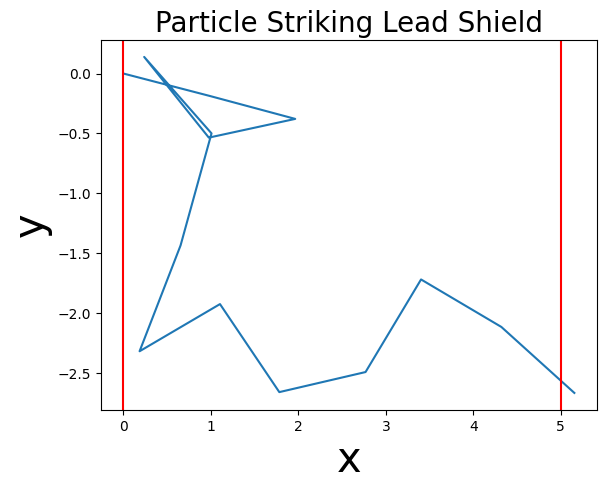

In [71]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

def walkP(x_i, y_i, L):
    xNew = [x_i]
    yNew = [y_i]
    for i in range(L):
        the0 = np.random.uniform(0, 2*np.pi)
        x_i += np.cos(the0)
        y_i += np.sin(the0)
        yNew.append(y_i)
        xNew.append(x_i)
        if x_i > 5 or x_i < 0:
            break
    return xNew, yNew

def main():
    free = 0
    L = 15
    x_i = 0
    y_i = 0
    attempt = 1
    x, y = walkP(x_i, y_i, L)
    # For Part B
    y_esc = []
    while x[-1] < 5:
        x,y = walkP(x_i, y_i, L)
        # For Part A
        if x[-1] > 5:
            free += 1
        attempt += 1
    plt.plot(x, y)
    plt.xlabel("x", size = 30)
    plt.ylabel("y", size = 30)
    plt.axvline(x = 0, color = 'r')
    plt.axvline(x = 5, color = 'r')
    plt.title("Particle Striking Lead Shield", size = 20)
    plt.show()

if __name__ =="__main__":
    main()




(c) Draw the histogram of the $y$ coordinates where the neutrons exit the wall, assuming they enter at $y = 0$. Hint: should the distribution be symmetric about $\theta$? Why or why not?

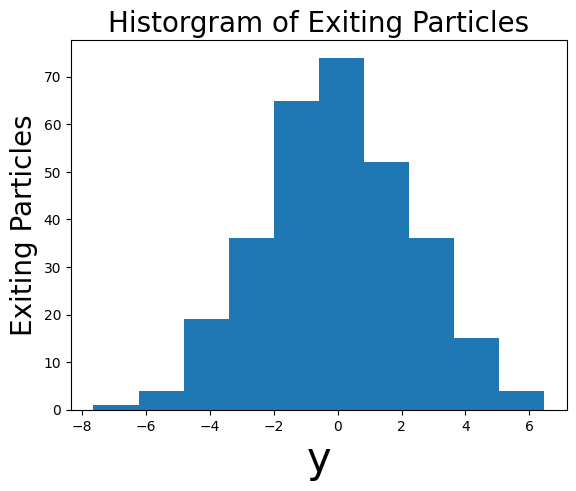

In [62]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

def walkP(x_i, y_i, L):
    xNew = [x_i]
    yNew = [y_i]
    for i in range(L):
        the0 = np.random.uniform(0, 2*np.pi)
        x_i += np.cos(the0)
        y_i += np.sin(the0)
        yNew.append(y_i)
        xNew.append(x_i)
        if x_i > 5 or x_i < 0:
            break
    return xNew, yNew

def main():
    free = 0
    L = 15
    x_i = 0
    y_i = 0
    attempt = 1
    x, y = walkP(x_i, y_i, L)
    N = 10000
    # For Part B
    y_esc = []
    while attempt < N:
        x,y = walkP(x_i, y_i, L)
        # For Part A
        if x[-1] > 5:
            free += 1
            y_esc.append(y[-1])
        attempt += 1
    plt.hist(y_esc)
    plt.xlabel("y", size = 30)
    plt.ylabel("Exiting Particles", size = 20)
    plt.title("Historgram of Exiting Particles", size = 20)
    plt.show()

if __name__ =="__main__":
    main()




## Problem 4 Ising Model

Landau 17.4.2 (Thermodynamic properties of ferromagnetic 1-D Ising model in equilibrium) 

(a) Calculate the internal energy $U$ and the magnetization $M$ at $kT = 1$ for the chain with $N = 100$. 

In [39]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# For this problem I have to find:
## Find U and M
### Considering that: kT = 1 for the chain N = 100 
random.seed()
def energy(N, B, mu, J, k, T , s_i):
    sum1 = -J
    sum2 = -B*mu
    for i in range (0, N-1):
        sum1 += -J*s_i[i]*s_i[i+1]
    sum1 += -J*s_i[N-1]*s_i[0]
    for i in range(0, N-2):
        sum2 += -mu*s_i[i]*B
    return (sum1 , sum2)

def ising_algo(N, B, mu, J, k, T , s_i):
    for i in range(0, N):
        s_i[i] = -1
    ES, M = energy(N, B, mu, J, k, T, s_i)
    energyVals = []
    mVals = []
    stepSize = 10*N
    for i in range(stepSize):
        test_state = list(s_i)
        random_site = int(N*random.random())
        test_state[random_site] *= -1.
        ET, Mc = energy(N, B, mu, J, k, T, test_state)
        R = np.exp((ES-ET)/k*T)
        if R > random.random():
            s_i = test_state
            ES = ET
            energyVals.append(ES)
            mVals.append(Mc)
    sum1 = 0.0
    sum2 = 0.0
    for j in range(len(energyVals)):
        sum1 += energyVals[j]
        sum2 += mVals[j]
    U = sum1 / stepSize
    M = sum2 / stepSize
    return U, M

def main():

    N = 100
    B = 1.
    mu = 0.33
    J = 0.2
    k = 1.
    T = 1.
    s_i = np.zeros(N)

    U, M = ising_algo(N, B, mu, J, k, T, s_i)
    print("Energy value is:",U)
    print("Magnetization value is:",M)

if __name__ == "__main__":
    main()


Energy value is: -3.608599999999998
Magnetization value is: 1.4140500000000003


(b) Plot the results as a function of $kT$ and check them against Figure 17.3. 

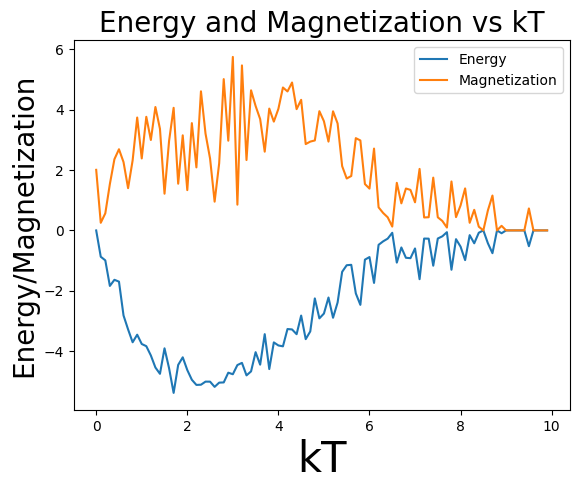

In [68]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# For this problem I have to find:
## 

random.seed()
def energy(N, B, mu, J, k, T , s_i):
    sum1 = -J
    sum2 = -B*mu
    for i in range (0, N-1):
        sum1 += -J*s_i[i]*s_i[i+1]
    sum1 += -J*s_i[N-1]*s_i[0]
    for i in range(0, N-2):
        sum2 += -mu*s_i[i]*B
    return (sum1 , sum2)

def ising_algo(N, B, mu, J, k, T , s_i):
    for i in range(0, N):
        s_i[i] = -1
    ES, M = energy(N, B, mu, J, k, T, s_i)
    energyVals = []
    mVals = []
    stepSize = 10*N
    for i in range(stepSize):
        test_state = list(s_i)
        random_site = int(N*random.random())
        test_state[random_site] *= -1.
        ET, Mc = energy(N, B, mu, J, k, T, test_state)
        R = np.exp((ES-ET)/k*T)
        if R > random.random():
            s_i = test_state
            ES = ET
            energyVals.append(ES)
            mVals.append(Mc)
    sum1 = 0.0
    sum2 = 0.0
    for j in range(len(energyVals)):
        sum1 += energyVals[j]
        sum2 += mVals[j]
    U = sum1 / stepSize
    M = sum2 / stepSize
    return U, M

def main():
    N = 100
    B = 1.
    mu = 0.33
    J = 0.2
    k = 1.
    T = 1.

    s_i = np.zeros(N)
    tk_vals = np.arange(0.0, 10.0, 0.1)

    uVals = []
    mVals = []
    for i in range(len(tk_vals)):
        uVal, mVal = ising_algo(N, B, mu, J, k, tk_vals[i], s_i)
        uVals.append(uVal)
        mVals.append(mVal)
    plt.plot(tk_vals, uVals)
    plt.plot(tk_vals, mVals)
    plt.legend(['Energy', 'Magnetization'])
    plt.xlabel("kT", size = 30)
    plt.ylabel("Energy/Magnetization", size = 20)
    plt.title("Energy and Magnetization vs kT", size = 20)
    plt.show()

if __name__ == "__main__":
    main()


(c) Show that the agreement with the analytic results in Section 17.3.1 is better for $N = 2000$ than for $N = 100$.

In [43]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random

# For this problem I have to find:
## 

random.seed()
def energy(N, B, mu, J, k, T , s_i):
    sum1 = 0
    sum2 = 0
    for i in range (1, N-1):
        sum1 += -J*s_i[i]*s_i[i+1]
    sum1 += -J*s_i[N-1]*s_i[0]
    for i in range(1, N):
        sum2 += -mu*s_i[i]*B
    return (sum1 , sum2)

def ising_algo(N, B, mu, J, k, T , s_i):
    for i in range(0, N):
        s_i[i] = -1
    ES, M = energy(N, B, mu, J, k, T, s_i)
    energyVals = []
    mVals = []
    stepSize = 10*N
    for i in range(stepSize):
        test_state = list(s_i)
        random_site = int(N*random.random())
        test_state[random_site] *= -1.
        ET, Mc = energy(N, B, mu, J, k, T, test_state)
        R = np.exp((ES-ET)/k*T)
        if R >= random.random():
            s_i = test_state
            ES = ET
            energyVals.append(ES)
            mVals.append(Mc)
        else:
            R = np.exp((ES-ET)/k*T)
            if R >= random.random():
                energyVals.append(ES)
                mVals.append(Mc)
    sum1 = 0.0
    sum2 = 0.0
    for j in range(len(energyVals)):
        sum1 += energyVals[j]
        sum2 += mVals[j]
    U = sum1 / N
    M = sum2 / N
    return U, M

def ana_sol(N, B, mu, J, k, T , s_i):
    U = (-J*N)*np.tanh((J/k*T))
    M = N*np.exp(J/k*T)*np.sinh(B/k*T) * pow(np.exp(2*J/k*T)*pow(np.sinh(B/k*T), 2) + np.exp(-2*J/k*T), -0.5)
    return U, M

def main():
    N = [100, 2000]
    B = 1.
    mu = 0.33
    J = 0.2
    k = 1.
    T = 1.
    for i in range(2):
        s_i = np.zeros(N[i])
        uA, mA = ana_sol(N[i], B, mu, J, k, T, s_i)
        u, m = ising_algo(N[i], B, mu, J, k, T, s_i)
        error1 = abs((uA-u)/uA)*100
        error2 = abs((mA-m)/mA)*100
        print(f"N ={N[i]}, yields an analytical solutions of, U = {uA}  and M = {mA}. While the approximate solutions are, U = {u} and M = {m}.".format(N[i], uA, mA, u, m))
        print("\n")
        print(f"The relative error of U and M for N = {N[i]}, are: {error1} and {error2}, respectively.".format(N[i], error1, error2))
        print("\n")

   
if __name__ == "__main__":
    main()


N =100, yields an analytical solutions of, U = -3.94750640449808  and M = 86.86324306218927. While the approximate solutions are, U = -39.04999999999998 and M = 9.520499999999922.


The relative error of U and M for N = 100, are: 889.2320872615567 and 89.03966779920503, respectively.


N =2000, yields an analytical solutions of, U = -78.9501280899616  and M = 1737.2648612437854. While the approximate solutions are, U = -814.7974999999865 and M = 535.7172149999992.


The relative error of U and M for N = 2000, are: 932.0407575166264 and 69.1631813345689, respectively.


